# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
# import utils

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
import seaborn as sns
palette=sns.color_palette("Spectral")
sns.set_palette(palette)

# Data Read

In [ ]:
#  Loading the database
url = "/content/drive/MyDrive/zomato.csv"
df = pd.read_csv(url)
print(df.head)

<bound method NDFrame.head of                                                      url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1s

# Exploratory Data Analysis

In [ ]:
df.describe

<bound method NDFrame.describe of                                                      url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

We can drop dish_liked column since it contains a lot of null values.

In [ ]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
df.reviews_list.head()

0    [('Rated 4.0', 'RATED\n  A beautiful place to ...
1    [('Rated 4.0', 'RATED\n  Had been here for din...
2    [('Rated 3.0', "RATED\n  Ambience is not that ...
3    [('Rated 4.0', "RATED\n  Great food and proper...
4    [('Rated 4.0', 'RATED\n  Very good restaurant ...
Name: reviews_list, dtype: object

In [ ]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
#Converting 'NEW' and '-' fields to 0 and changing rate to floats
def n(num):
  return num!=num
for i in range(len(df)):
  if(str(df.loc[i,"rate"])=='-' or str(df.loc[i,"rate"])=='NEW' or n((df.loc[i,"rate"]))):
    df.loc[i,"rate"]='0/5'
  df.loc[i,"rate"]=float(''.join(str(df.loc[i,"rate"]).split())[:-2])


In [ ]:
def n(num):
  return num!=num
for i in range(len(df)):
  if(n(df.loc[i,"approx_cost(for two people)"])):
    df.loc[i,"approx_cost(for two people)"]='0'
  df.loc[i,"approx_cost(for two people)"]=str(df.loc[i,"approx_cost(for two people)"]).replace(",","")


In [ ]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', '0', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

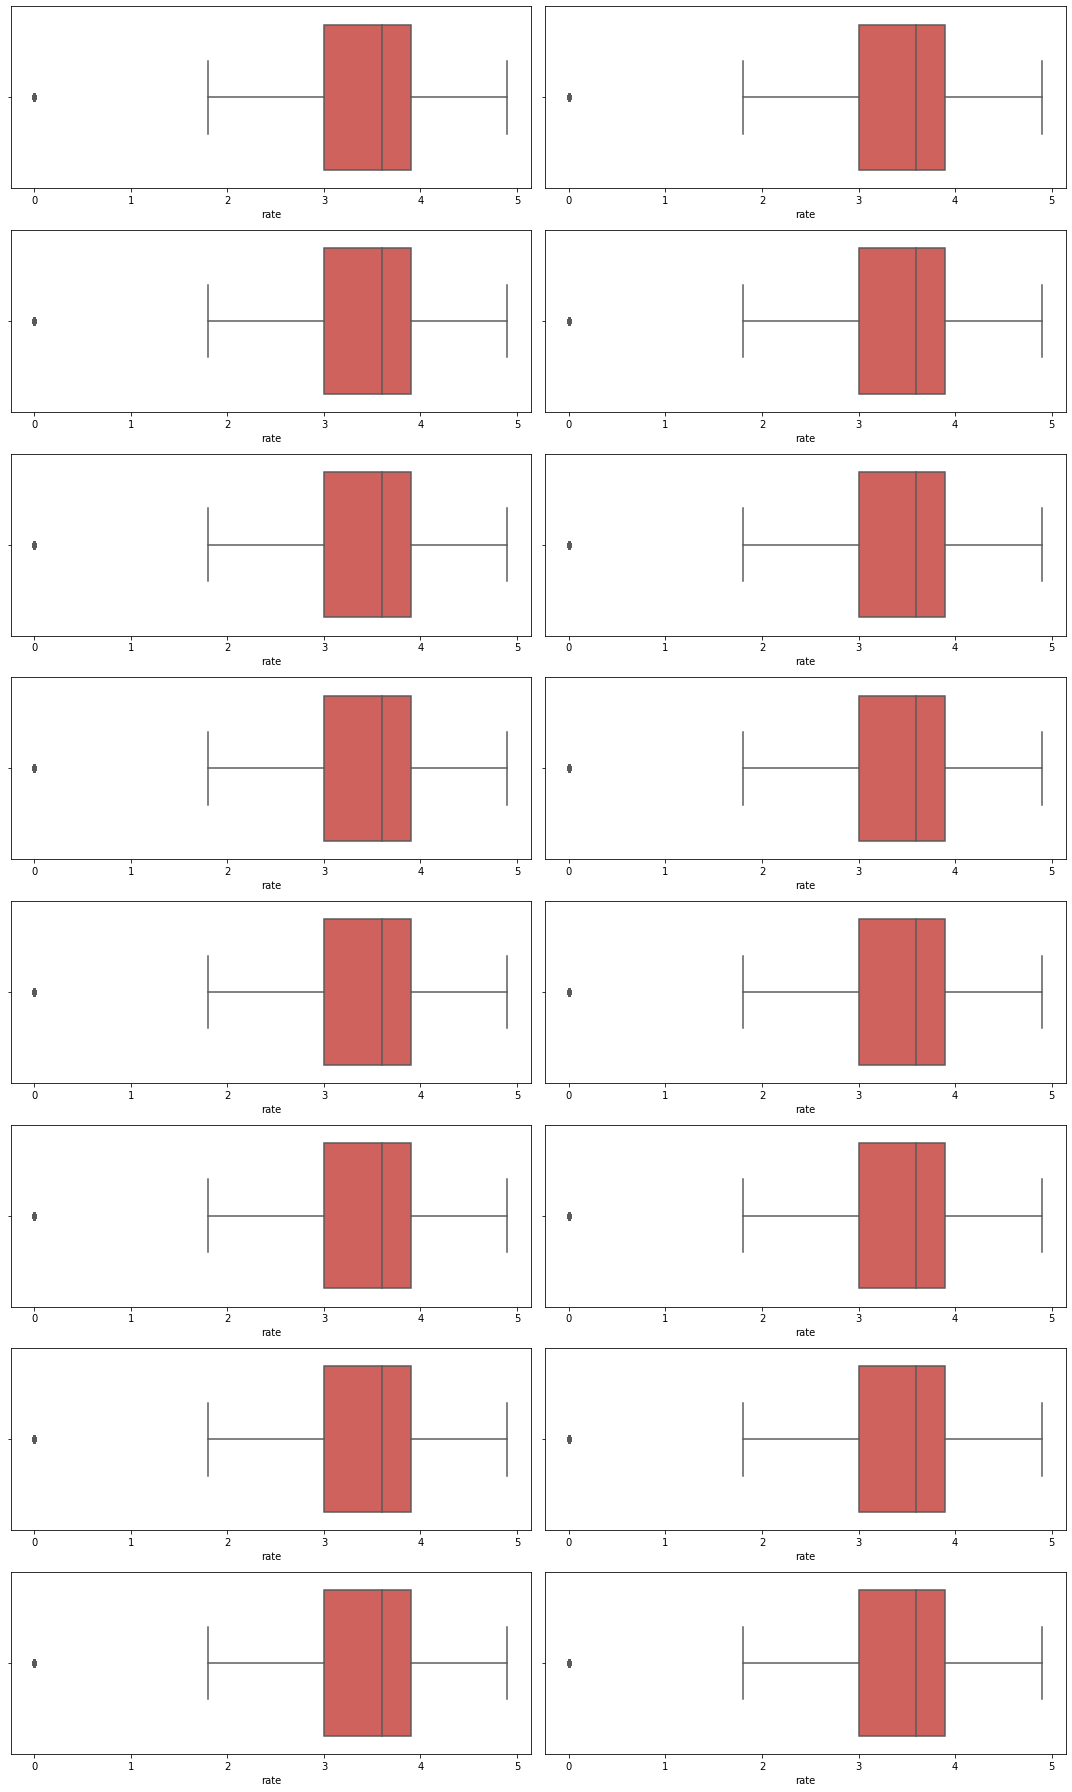

In [ ]:
fig,ax=plt.subplots(8,2,figsize=(15,25))
for v,subplot in zip(df.columns,ax.flatten()):
  sns.boxplot(x=df["rate"],ax=subplot)
plt.tight_layout()

In [ ]:
df=df.drop(['dish_liked'],axis=1)
df=df.drop(['url', 'address', 'phone', 'menu_item'], axis=1)
df=df.dropna()
df=df.drop_duplicates()


In [ ]:
df['reviews_list'].apply(lambda row: len(row))


0         3955
1         5256
2         7549
3        14876
4          702
         ...  
51712     3709
51713        2
51714        2
51715     3341
51716      945
Name: reviews_list, Length: 51394, dtype: int64

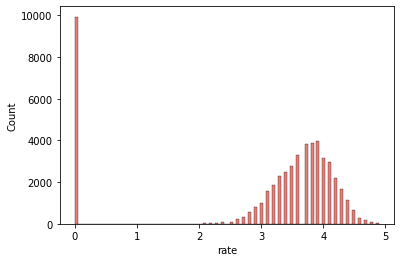

In [ ]:
# histplot for rate feature
_=sns.histplot(x='rate',data=df)

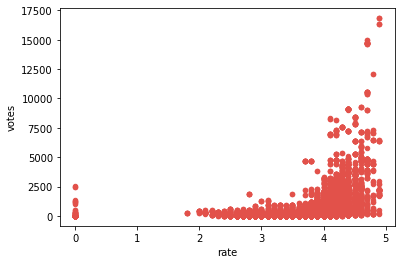

In [ ]:
df.plot.scatter(x='rate',y='votes')

In [ ]:
df.name.value_counts()

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Crescent Moon Bakery                                        1
Foodizclub                                                  1
Three Side Square                                           1
Grub Bucket                                                 1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8755, dtype: int64

In [ ]:
df.rest_type.value_counts()

Quick Bites                   19098
Casual Dining                 10312
Cafe                           3730
Delivery                       2591
Dessert Parlor                 2260
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

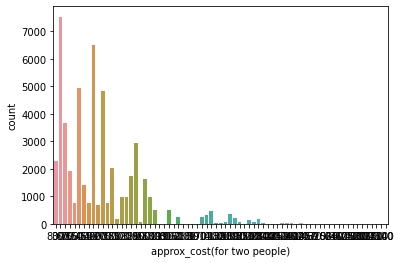

In [ ]:
# histplot for approx cost feature
_=sns.countplot(x='approx_cost(for two people)',data=df)

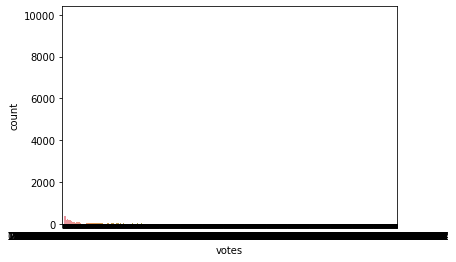

In [ ]:
_=sns.countplot(x=np.log(df['votes']+1),data=df)

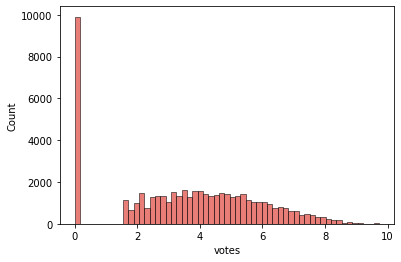

In [ ]:
_=sns.histplot(x=np.log(df['votes']+1),data=df)

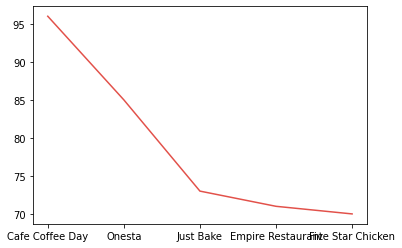

In [ ]:
a=df.name.value_counts()
plt.plot(a[0:5])
plt.show()

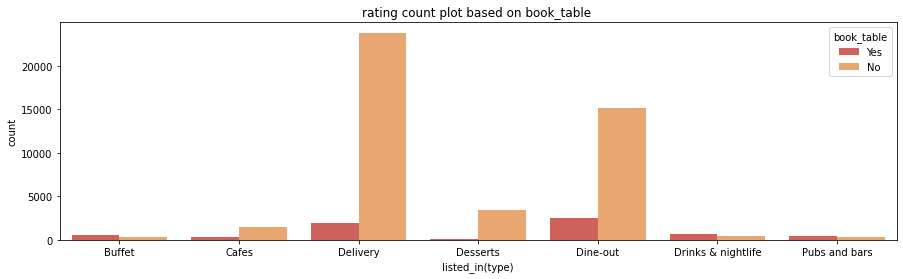

In [ ]:



#rating counts using book_table as legend
fig = plt.figure(figsize=[15,4])
plt.title("rating count plot based on book_table ")
sns.countplot(x="listed_in(type)", hue="book_table", data=df)
plt.show()


In [ ]:
print(df.head)

<bound method NDFrame.head of                                                     name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table rate  votes                    location            rest_type  \
0           